<a href="https://colab.research.google.com/github/HimelDx1/flower-cloassification/blob/main/2215151158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds

# Load the flowers dataset
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)
train_ds = dataset['train']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.5DKQ8M_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
import tensorflow as tf

IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # normalize
    return image, label

train_ds = train_ds.map(preprocess).batch(BATCH_SIZE).shuffle(1000)


In [ ]:
base_model = tf.keras.applications.ResNet50(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze weights

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = model.fit(train_ds, epochs=5)


Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 610s 5s/step - accuracy: 0.2956 - loss: 1.5830
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 621s 5s/step - accuracy: 0.3774 - loss: 1.4556
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 582s 5s/step - accuracy: 0.4174 - loss: 1.4074
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 597s 5s/step - accuracy: 0.4311 - loss: 1.3808
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 598s 5s/step - accuracy: 0.4350 - loss: 1.3836


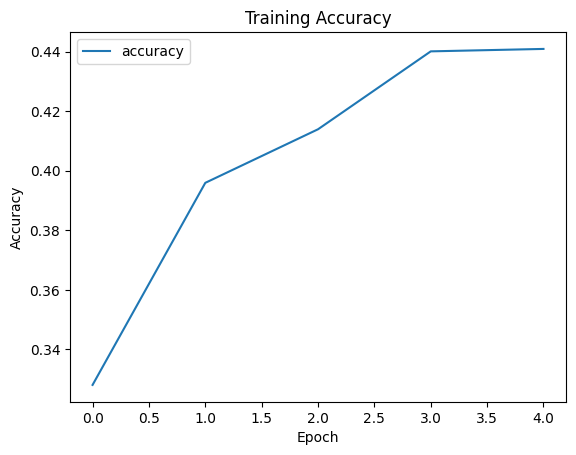

In [ ]:
# Plot accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1]:
from google.colab import files
from PIL import Image
import numpy as np
import tensorflow as tf # Import tensorflow

# Upload real flower image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = Image.open(img_path).resize((224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)
predicted_class = tf.argmax(prediction[0]).numpy()
labels = info.features['label'].names
print("Predicted Flower:", labels[predicted_class])

Saving IMG_20250529_213210.jpg to IMG_20250529_213210.jpg


NameError: name 'tf' is not defined